In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pickle
from pylab import *
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import scipy
tl=tight_layout
ion()
totalDur = 0

In [3]:
def loaddat (simname, bNumber):
  global totalDur
  d = pickle.load(open('../data/'+simname+'/'+simname+'_'+str(bNumber)+'_data.pkl','rb'))
  simConfig = d # ['simConfig']
  sdat = d['simData']
  totalDur = d['simConfig']['duration']
  dstartidx,dendidx={},{} # starting,ending indices for each population
  for p in simConfig['net']['params']['popParams'].keys():
    if 'tags' in simConfig['net']['pops'][p]:
      numCells = simConfig['net']['pops'][p]['tags']['numCells']
    else:
      numCells = simConfig['net']['pops'][p]['numCells']
    if numCells > 0:
      dstartidx[p] = simConfig['net']['pops'][p]['cellGids'][0]
      dendidx[p] = simConfig['net']['pops'][p]['cellGids'][-1]
  dnumc = {}
  for p in simConfig['net']['pops'].keys():
    if p in dstartidx:
      dnumc[p] = dendidx[p]-dstartidx[p]+1
    else:
      dnumc[p] = 0
  spkID= np.array(simConfig['simData']['spkid'])
  spkT = np.array(simConfig['simData']['spkt'])
  dspkID,dspkT = {},{}
  for pop in simConfig['net']['pops'].keys():
    if dnumc[pop] > 0:
      dspkID[pop] = spkID[(spkID >= dstartidx[pop]) & (spkID <= dendidx[pop])]
      dspkT[pop] = spkT[(spkID >= dstartidx[pop]) & (spkID <= dendidx[pop])]      
  return simConfig, sdat, dstartidx, dendidx, dnumc, dspkID, dspkT

In [4]:
def IsCortical (ty): return ty.startswith('L') and ty.count('_') > 0

def IsThal (ty): return not IsCortical(ty)

def GetCellType (idx, dnumc, dstartidx, dendidx):
  for ty in dnumc.keys():
    if idx >= dstartidx[ty] and idx <= dendidx[ty]: return ty
  return -1

def GetCellCoords (simConfig, idx):
  if 'tags' in simConfig['net']['cells'][idx]:
    return [simConfig['net']['cells'][idx]['tags'][k] for k in ['x','y','z']]
  else:
    return [simConfig['net']['cells'][idx][k] for k in ['x','y','z']]    

In [5]:
with open('../info/anatomy/S1-cells-distributions-Rat.txt') as mtype_file:
    mtype_content = mtype_file.read()       

cellNumber = {} 
cellNumberi = {} 
cellNumberf = {} 
cellNbr = 0
for line in mtype_content.split('\n')[:-1]:
    
    cellname, mtype, etype, n, m = line.split()
    
    metype = mtype + '_' + etype[0:3]
    cellNumber[metype] = int(n) 
    
    cellNumberi[metype] = cellNbr
    cellNumberf[metype] = int(n) + cellNbr
    
    cellNbr += cellNumber[metype]

In [6]:
simname = 'v11_batch1'

ltyunique = sorted(cellNumber.keys())

meinit = 0
mefinal = 0

cellNumidx = []
cellididx = []
DataspkID = {}
DataspkTime = {}
Meanfreq = {}
preMeanfreq = {}
for metype in ltyunique:
    DataspkID[metype] = []
    DataspkTime[metype] = []
    Meanfreq[metype] = 0
    preMeanfreq[metype] = 0

cellPos = []
cellDipoles = []
lty = []


for bNumber in range(52):  
    
    print(simname+'_'+str(bNumber))
    
    try:
        simConfig, sdat, dstartidx, dendidx, dnumc, dspkID, dspkT = loaddat (simname, bNumber)
          
        if bNumber == 0:
            for metype in ltyunique[0:4]:
                preMeanfreq[metype] = 0
            for metype in ltyunique[4:207]:
                preMeanfreq[metype] = sdat['popRates']['presyn_'+metype]        

        lidx = sorted(list(sdat['dipoleCells'].keys()))

        meinit = 4*(bNumber)
        mefinal = 4*(bNumber + 1)

        for ii,idx in enumerate(lidx):
            ltyidx = GetCellType(idx,dnumc,dstartidx,dendidx)
            if ltyidx in ltyunique[meinit:mefinal]:
#                 print(idx,ltyidx)
                cellNumidx.append(idx)
                cellididx.append(ltyidx)

                lty.append(ltyidx)

                cellPos.append(GetCellCoords(simConfig,idx))
                cellDipoles.append(sdat['dipoleCells'][idx])

        for metype in ltyunique[meinit:mefinal]:
            Meanfreq[metype] = sdat['popRates'][metype]
            for iid,idd in enumerate(dspkID[metype]):
                DataspkID[metype].append(idd)
                DataspkTime[metype].append(dspkT[metype][iid])
        
    except:
        
        print('ERROR IN ', simname+'_'+str(bNumber))
                    
        meinit = 4*(bNumber)
        mefinal = 4*(bNumber + 1)
        
        for metype in ltyunique[meinit:mefinal]:
            print(metype,'not inclued')
        


v11_batch1_0
v11_batch1_1
v11_batch1_2
v11_batch1_3
v11_batch1_4
v11_batch1_5
v11_batch1_6
v11_batch1_7
v11_batch1_8
v11_batch1_9
v11_batch1_10
v11_batch1_11
v11_batch1_12
v11_batch1_13
ERROR IN  v11_batch1_13
L23_NGC_cST not inclued
L23_PC_cAD not inclued
L23_SBC_bNA not inclued
L23_SBC_cAC not inclued
v11_batch1_14
v11_batch1_15
ERROR IN  v11_batch1_15
L4_BP_cAC not inclued
L4_BP_cNA not inclued
L4_BP_dST not inclued
L4_BTC_bAC not inclued
v11_batch1_16
ERROR IN  v11_batch1_16
L4_BTC_bIR not inclued
L4_BTC_bST not inclued
L4_BTC_cAC not inclued
L4_BTC_cNA not inclued
v11_batch1_17
ERROR IN  v11_batch1_17
L4_BTC_dNA not inclued
L4_ChC_cAC not inclued
L4_ChC_cNA not inclued
L4_ChC_dNA not inclued
v11_batch1_18
ERROR IN  v11_batch1_18
L4_DBC_bAC not inclued
L4_DBC_bIR not inclued
L4_DBC_bNA not inclued
L4_DBC_bST not inclued
v11_batch1_19
ERROR IN  v11_batch1_19
L4_DBC_cAC not inclued
L4_DBC_cIR not inclued
L4_DBC_cNA not inclued
L4_LBC_cAC not inclued
v11_batch1_20
ERROR IN  v11_batch1

In [12]:
for bNumber in range(52):      
    meinit = 4*(bNumber)
    mefinal = 4*(bNumber + 1)            
    for metype in ltyunique[meinit:mefinal]:             
        print('%s \t %.2f Hz\t  %.2f Hz \t pre' % (metype,Meanfreq[metype],preMeanfreq[metype]))

L1_DAC_bNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_DAC_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_DLAC_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_HAC_bNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_HAC_cIR 	 0.00 Hz	  0.00 Hz 	 pre
L1_HAC_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_NGC-DA_bNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_NGC-DA_cAC 	 0.00 Hz	  0.00 Hz 	 pre
L1_NGC-DA_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_NGC-DA_cST 	 0.00 Hz	  0.00 Hz 	 pre
L1_NGC-SA_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L1_SLAC_bNA 	 0.00 Hz	  0.01 Hz 	 pre
L1_SLAC_cAC 	 0.00 Hz	  0.00 Hz 	 pre
L1_SLAC_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L23_BP_bAC 	 1.22 Hz	  0.73 Hz 	 pre
L23_BP_bIR 	 0.72 Hz	  0.45 Hz 	 pre
L23_BP_bNA 	 3.10 Hz	  2.93 Hz 	 pre
L23_BP_cAC 	 2.52 Hz	  3.27 Hz 	 pre
L23_BP_cNA 	 5.37 Hz	  4.83 Hz 	 pre
L23_BP_dST 	 0.38 Hz	  0.84 Hz 	 pre
L23_BTC_bAC 	 0.00 Hz	  0.00 Hz 	 pre
L23_BTC_bIR 	 0.00 Hz	  0.00 Hz 	 pre
L23_BTC_bNA 	 0.00 Hz	  0.00 Hz 	 pre
L23_BTC_cAC 	 0.02 Hz	  0.00 Hz 	 pre
L23_BTC_cNA 	 0.00 Hz	  0.00 Hz 	 pre
L23_ChC_cAC 	 0.30 Hz	  0.25 Hz 	 pre
L23_ChC_cNA 	

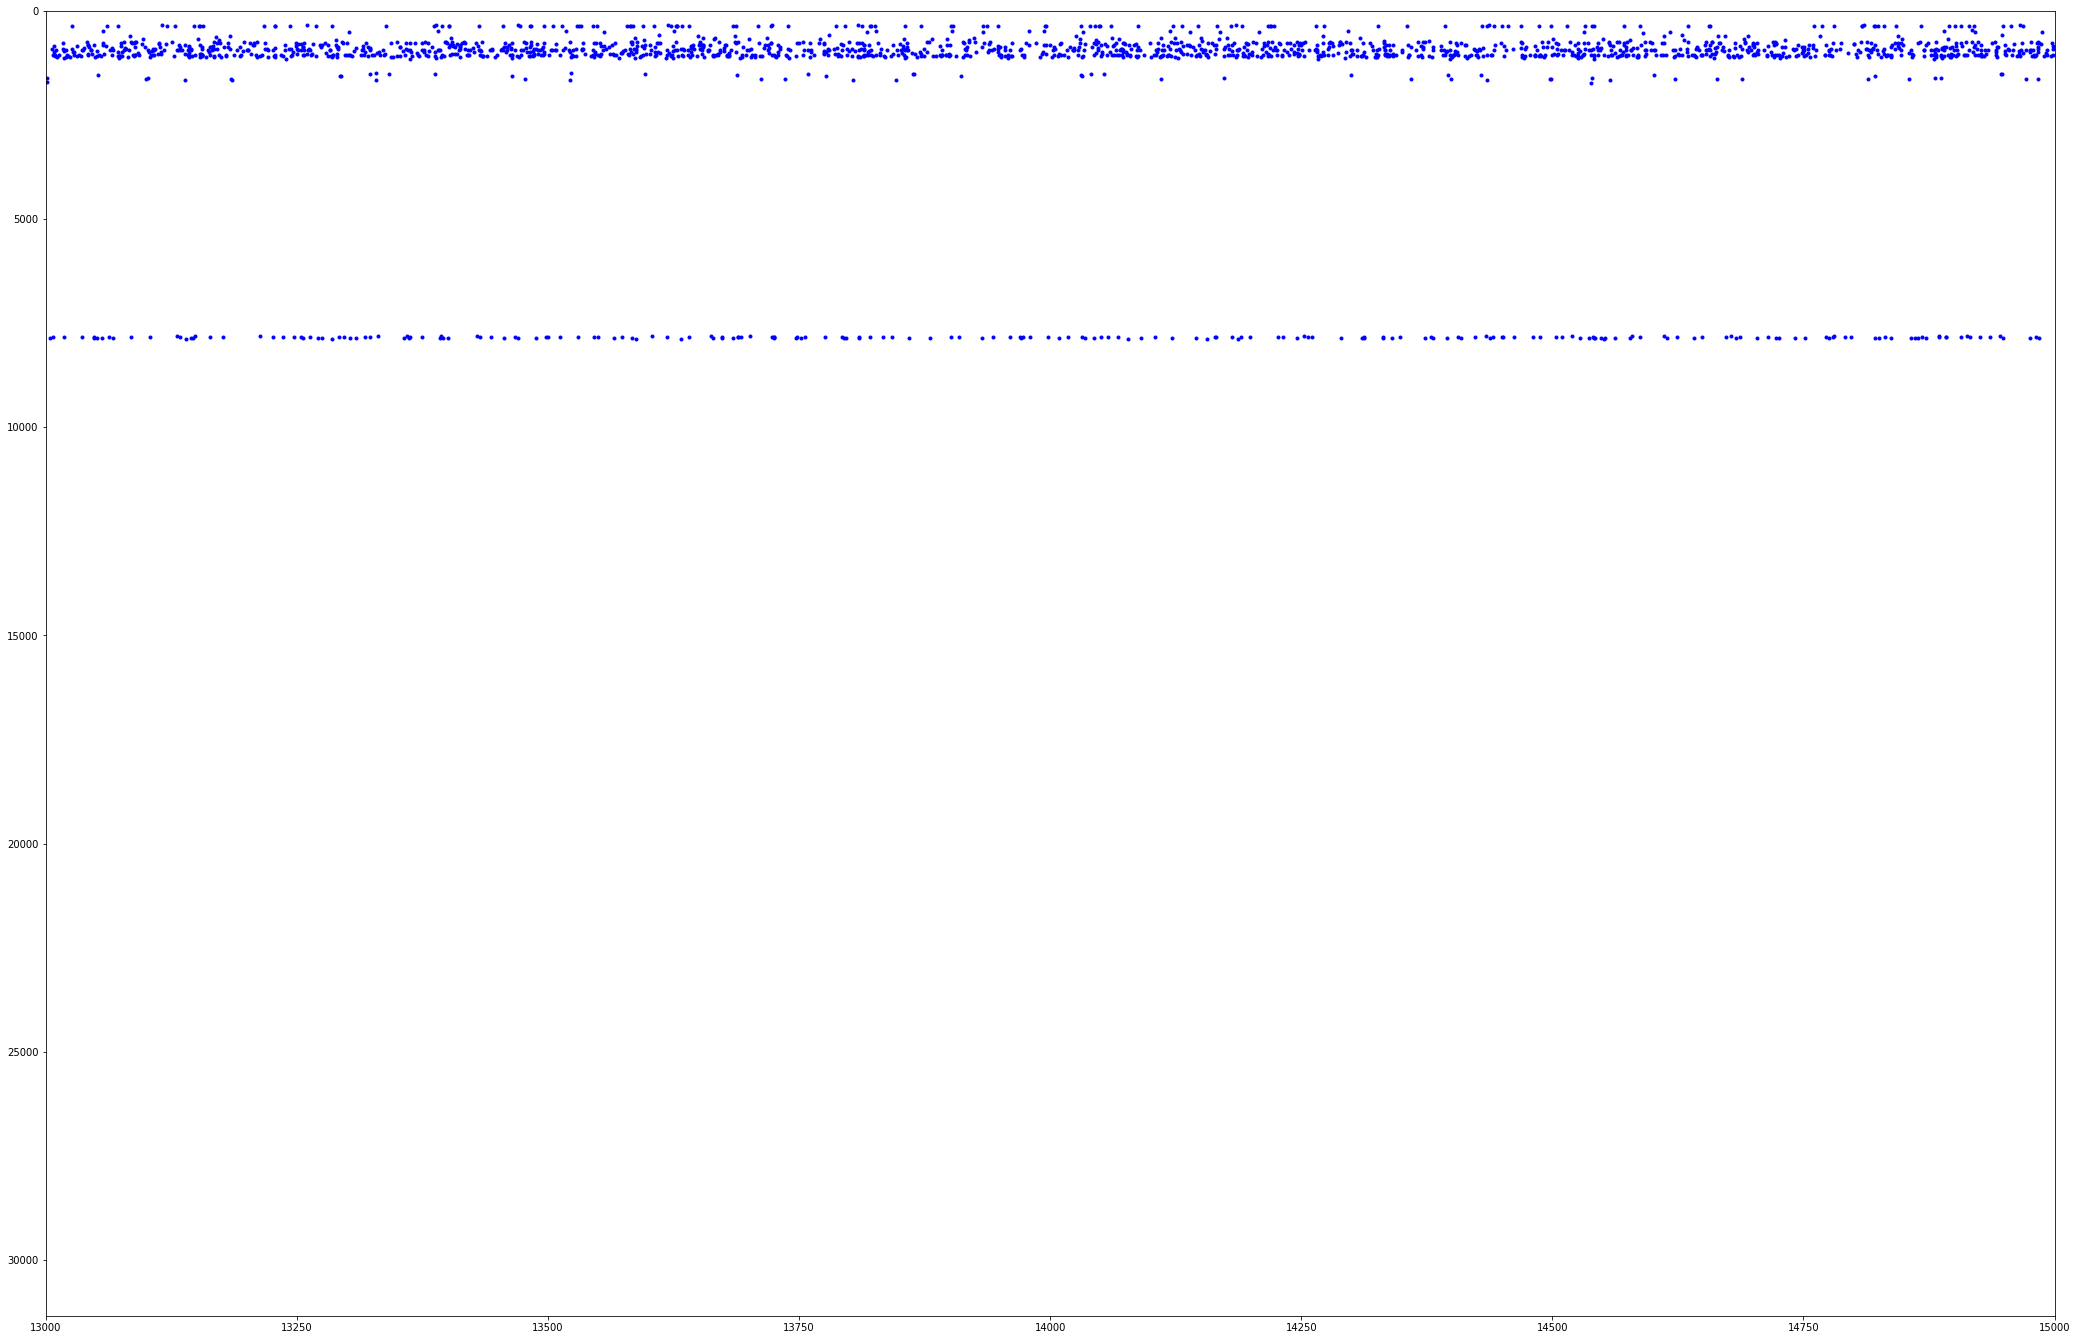

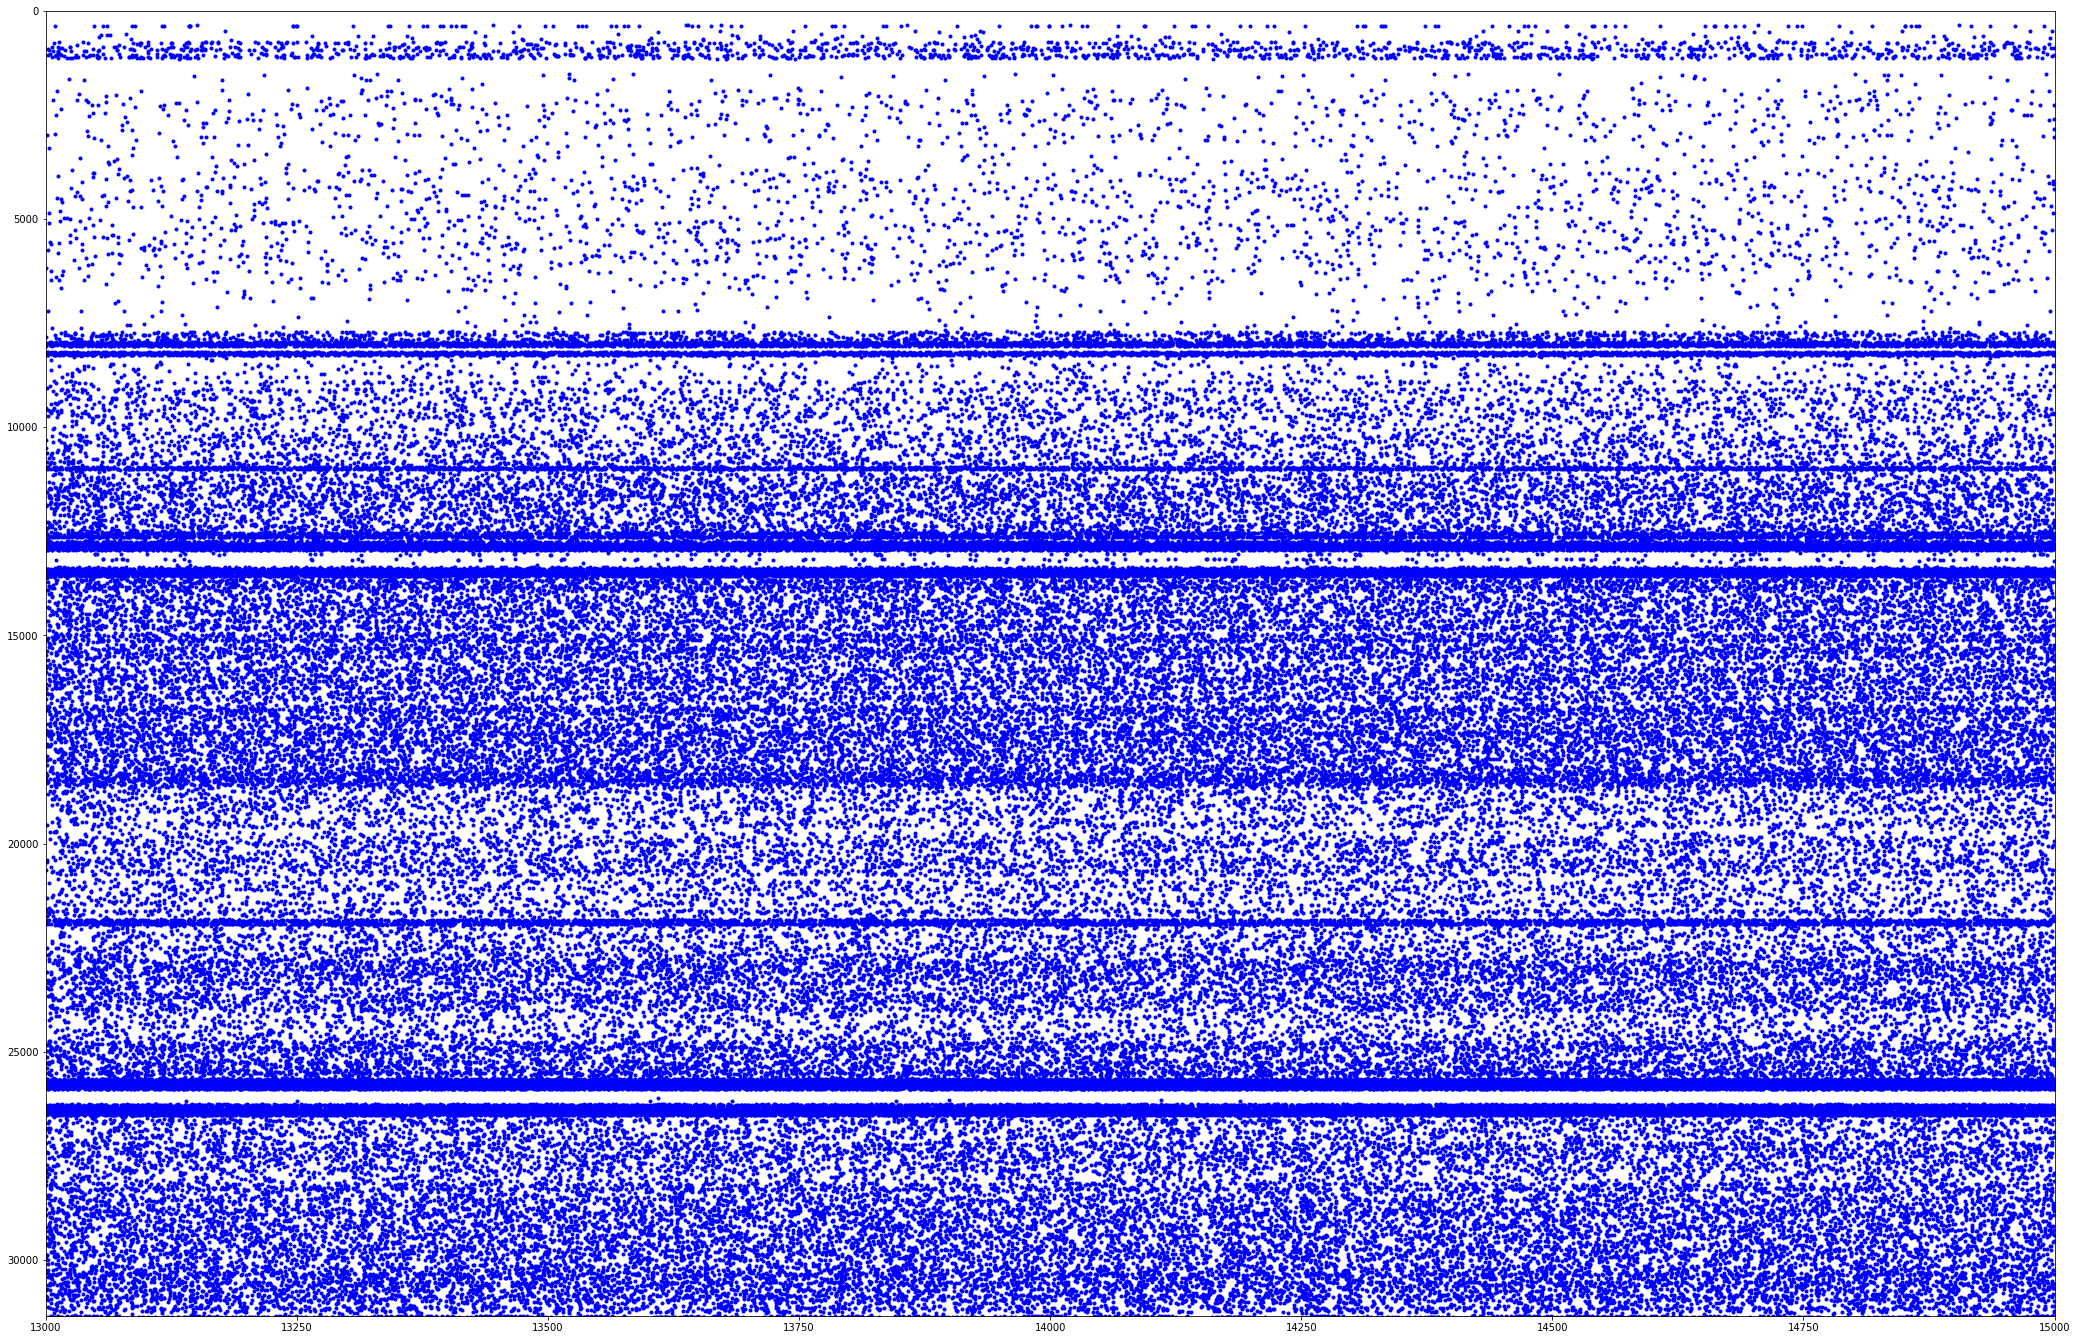

In [15]:
plt.figure(figsize=(36,24)) 

for metype in cellNumberi.keys():
    if np.size(DataspkID[metype]) > 0:
        DataspkID[metype] = DataspkID[metype] - np.min(DataspkID[metype]) + cellNumberi[metype]
        plt.plot(DataspkTime[metype],DataspkID[metype],'b.',label=metype);
# plt.legend()
plt.ylim(31346,0)
plt.xlim(13000,15000)

plt.savefig('../data/'+simname+'/'+simname+'_Raster_morphocells.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

bNumber = 0
simConfig, sdat, dstartidx, dendidx, dnumc, dspkID, dspkT = loaddat (simname, bNumber)
plt.figure(figsize=(36,24)) 
plt.plot(sdat['spkt'],np.array(sdat['spkid'])+cellNumberi['L1_HAC_cIR'], 'b.',label='presyns');
# plt.legend()
plt.xlim(13000,15000)
plt.ylim(31346,0);
plt.savefig('../data/'+simname+'/'+simname+'_Raster_spikecells.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [13]:
print(np.shape(cellPos), np.shape(lty), np.shape(cellDipoles))

((1864, 3), (1864,), (1864, 15000, 3))

In [16]:
# save dipoles in matlab format to file outfn
# adapting (not done yet) from https://github.com/NathanKlineInstitute/A1/blob/salva_layers/analysis/disc_grant.py#L368

from scipy import io

outfn = '../data/'+simname+'/'+simname+'_dipoles.mat'

matDat = {'cellPos': cellPos, 'cellPops': lty, 'cellDipoles': cellDipoles}
io.savemat(outfn, matDat)